In [54]:

import pandas as pd
import seaborn as sns 
from pandas import DataFrame
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import numpy as np
import plotly
import statistics
import plotly.express as px
import stats
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import plotly.express as px
import datetime
import datetime as dt
import time


cmap=sns.diverging_palette(239,244, as_cmap=True)

In [55]:
#data from Kaggle.com
#open file
swimming='outdoor-lap-swimming-1.csv'
df=pd.read_csv(swimming)
print(df.head(3))

       Date Borough Swimming_Pool Program_Type  Male_Registration  \
0  08/31/18   Bronx       Crotona    Night_Owl                  0   
1  08/30/18   Bronx       Crotona    Night_Owl                  0   
2  08/29/18   Bronx       Crotona    Night_Owl                  0   

   Female_Registration  Total_Registration  Male_Attendance  \
0                    0                   0                3   
1                    0                   0                2   
2                    3                   3                2   

   Female_Attendance  Total_Attendance  
0                  3                 6  
1                  3                 5  
2                  5                 7  


In [56]:
#parse index
df['Date']=pd.to_datetime(df['Date'], infer_datetime_format=True)
indexeddf=df.set_index(['Date'])
#print(indexeddf)

In [57]:
#parsing to time format and extracting dates 
x=df['Date']=pd.to_datetime(df['Date'], format='%d-%m-%y')
Day=df['Date'].dt.day_name()
Month=df['Date'].dt.month_name()
Year=df['Date'].dt.year

df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day_name()
print(df.head(3))

        Date Borough Swimming_Pool Program_Type  Male_Registration  \
0 2018-08-31   Bronx       Crotona    Night_Owl                  0   
1 2018-08-30   Bronx       Crotona    Night_Owl                  0   
2 2018-08-29   Bronx       Crotona    Night_Owl                  0   

   Female_Registration  Total_Registration  Male_Attendance  \
0                    0                   0                3   
1                    0                   0                2   
2                    3                   3                2   

   Female_Attendance  Total_Attendance  Year  Month        Day  
0                  3                 6  2018      8     Friday  
1                  3                 5  2018      8   Thursday  
2                  5                 7  2018      8  Wednesday  


# Monthly pool count per Borough 

In [58]:
p_counts = df.groupby(['Month', 'Borough']).size()
p_counts = p_counts.reset_index(name='count')
p_counts = p_counts.pivot(index = 'Month', columns = 'Borough', values = 'count')
p_counts.head()

Borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island
Month,,,,,
7,20.0,30.0,163.0,10.0,10.0
8,89.0,135.0,285.0,43.0,44.0
9,NaN,NaN,NaN,NaN,1.0


(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text xticklabel objects>)

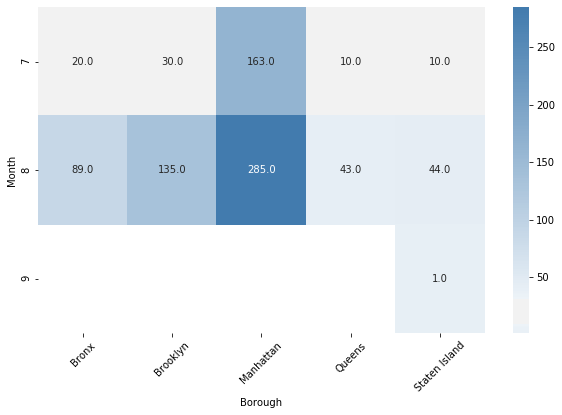

In [60]:
plt.figure(figsize=(10,6))
sns.heatmap(p_counts, fmt='.1f', annot = True, cmap=cmap, center = 20)
plt.xticks(rotation=45)

# Total attendance per day in August

In [80]:
#filter month 
#then count

August=df[df.Month==8]
July=df[df.Month==7]

p_counts = August.groupby(['Day', 'Program_Type']).size()
p_counts = p_counts.reset_index(name='count')
p_counts = p_counts.pivot(index = 'Day', columns = 'Program_Type', values = 'count')
p_counts.head()

Program_Type,Early_Bird,Night_Owl
Day,,
Friday,55,65
Monday,57,58
Thursday,56,63
Tuesday,55,52
Wednesday,70,65


(array([0.5, 1.5]), <a list of 2 Text xticklabel objects>)

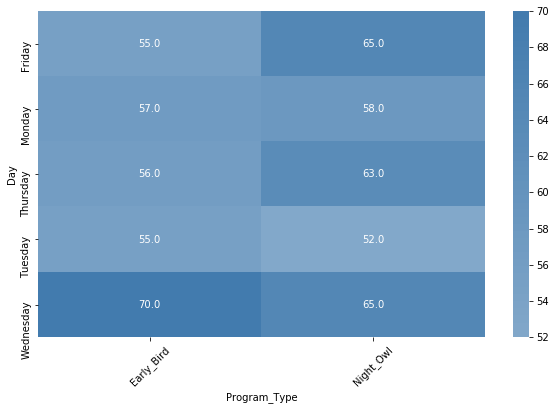

In [81]:
plt.figure(figsize=(10,6))
sns.heatmap(p_counts, fmt='.1f', annot = True, cmap=cmap, center = 20)
plt.xticks(rotation=45)

# Gender trends

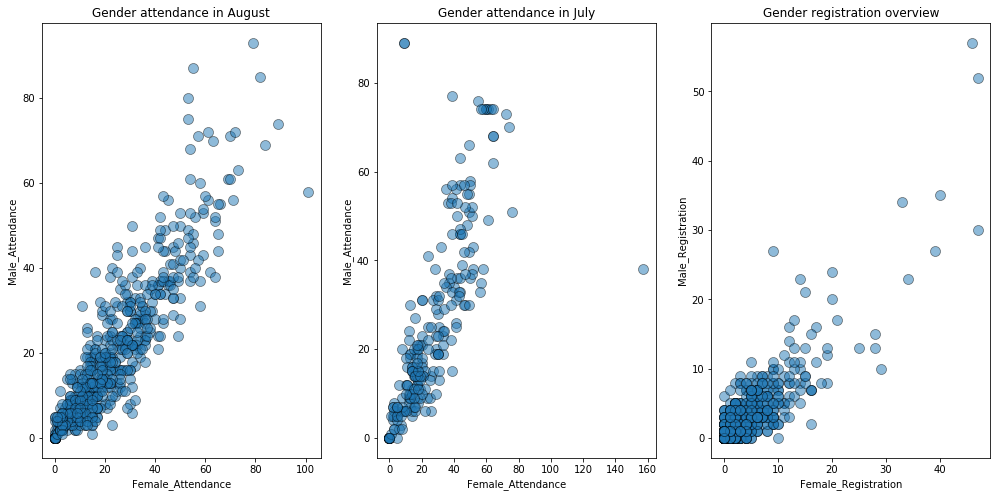

In [83]:
f,axes = plt.subplots(1,3, figsize=(17, 8))
C=sns.scatterplot(August.Female_Attendance, August.Male_Attendance, s=100, edgecolor='black', alpha=0.5,\
     palette='husl',ax=axes[0]).set_title("Gender attendance in August")

D=sns.scatterplot(July.Female_Attendance, July.Male_Attendance, s=100, edgecolor='black', alpha=0.5,\
     palette='husl',ax=axes[1]).set_title("Gender attendance in July")

E=sns.scatterplot(df.Female_Registration, df.Male_Registration, s=100, edgecolor='black', alpha=0.5,\
     palette='Blues',ax=axes[2]).set_title("Gender registration overview") #same trend as attenndance

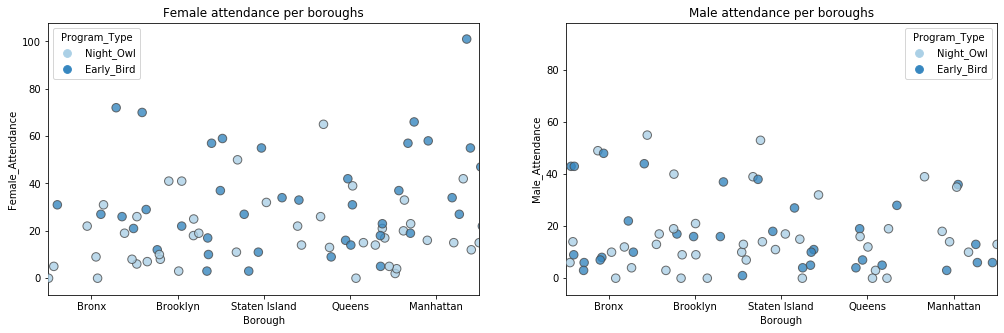

In [120]:
#plt.figure(figsize=(8,4))

f,axes = plt.subplots(1,2, figsize=(17, 5))
A=sns.stripplot(August.Borough, August.Female_Attendance,hue=August.Program_Type,jitter=18, marker='.',alpha=0.8, size=17, linewidth=1, palette="Blues",ax=axes[0]).set_title("Female attendance per boroughs")

B=sns.stripplot(August.Borough, August.Male_Attendance,hue=August.Program_Type,jitter=18, marker='.',alpha=0.8, size=17, linewidth=1, palette="Blues",ax=axes[1]).set_title("Male attendance per boroughs")
